# FINAL PROJECT

In [4]:
import pandas as pd


In [5]:
df = pd.read_csv(r'C:\Users\KIIT\Downloads\Final.csv')

In [6]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [7]:
df.shape

(1101925, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [9]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [10]:
df.fillna('NaN', inplace=True)

In [11]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")

In [12]:
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")

In [13]:
sanity = df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']]
print(sanity)
print(len(sanity))

         CUSTOMER_ORDER_ID  SALES_ORG  \
6                756619705       4269   
366              824655599       4346   
583              911886357       4078   
585              970279857       2868   
588              868088697       3564   
...                    ...        ...   
1101750          832828339       4390   
1101751          857097217       3216   
1101781          834722188       3797   
1101783          905569544       4391   
1101823          924902245       2640   

                                 DISTRIBUTION_CHANNEL      DIVISION  \
6                                             Bahrain  North-Region   
366                                        Azerbaijan  North-Region   
583                                           Mayotte  North-Region   
585                                            Taiwan  North-Region   
588                                       New Zealand  North-Region   
...                                               ...           ...   
1101750   

In [14]:
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index,inplace=True)

In [15]:
count1 = df['ORDER_AMOUNT'].str.count('-').sum()
print(count1)

32


In [16]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')

In [17]:
count2 = df['ORDER_AMOUNT'].str.count(',').sum()
print(count2)

1073406


In [18]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',','.')

In [19]:
count_equal = len(df[df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']])
print(count_equal)

100437


In [20]:
diff_currency = df['ORDER_CURRENCY'].value_counts()
print(diff_currency)

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [21]:
import pandas as pd
# Jotting down the exchanges rates from different currenies to USD in a dictionary and mapping them to a new column
exchange_rates = {
    'USD': 1,
    'EUR': 1.08,
    'AUD': 0.65,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.045,
    'HU1': 0.0029,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'],errors='coerce')
df['amount_in_usd'] = df['ORDER_AMOUNT'] * df['ORDER_CURRENCY'].map(exchange_rates)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000


In [22]:
zeros = (df['amount_in_usd'] == 0)
print(zeros)
print(zeros.sum())

0          False
1          False
2          False
3          False
4           True
           ...  
1101920    False
1101921     True
1101922     True
1101923     True
1101924    False
Name: amount_in_usd, Length: 1074783, dtype: bool
237821


In [23]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,1210354690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,1210336064
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,1210336064
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,1210336071
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,1210336071


PART 2

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:\Users\KIIT\Downloads\FINAL_NEW.csv')

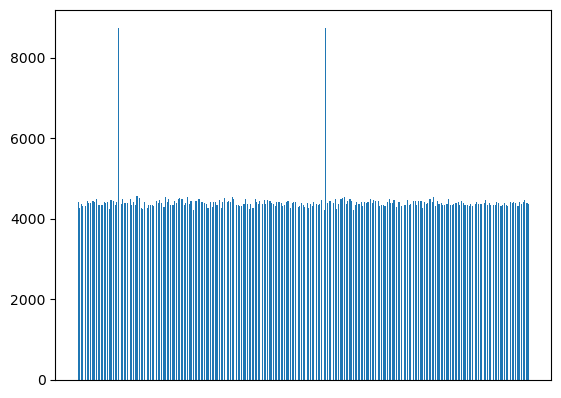

In [26]:
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

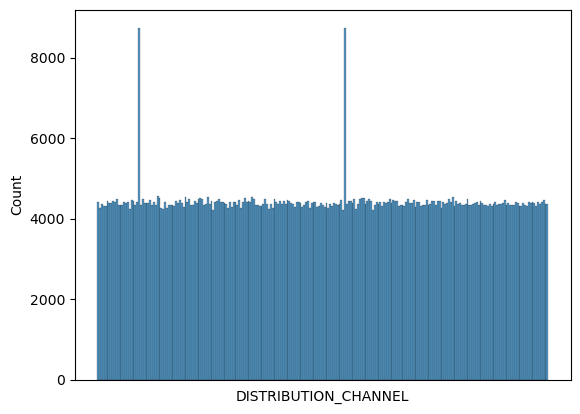

In [27]:
sns.histplot(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

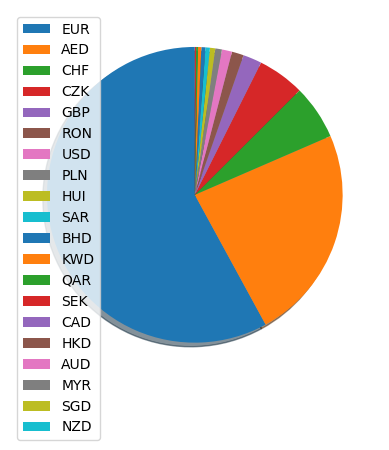

In [28]:
plt.pie(df['ORDER_CURRENCY'].value_counts(), shadow=True, startangle=90)
plt.legend(df['ORDER_CURRENCY'].unique(), loc='upper left')
plt.show()

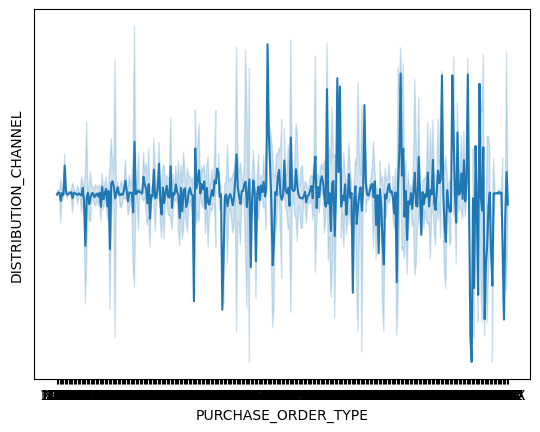

In [29]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.yticks([])
plt.show()

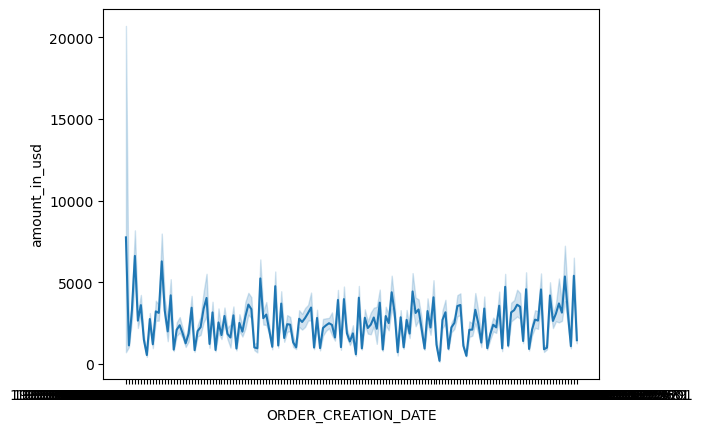

In [30]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['amount_in_usd'], data=df)
plt.show()

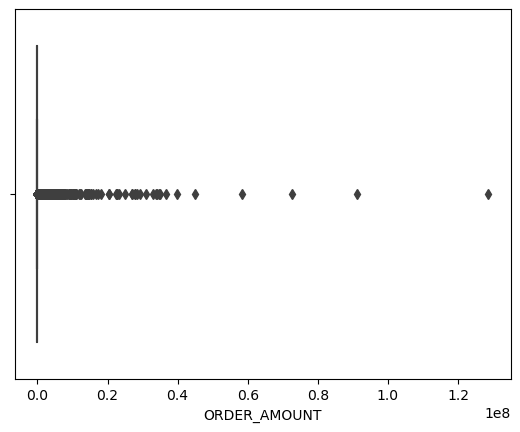

In [31]:
sns.boxplot(x=df['ORDER_AMOUNT'], data=df)
plt.show()

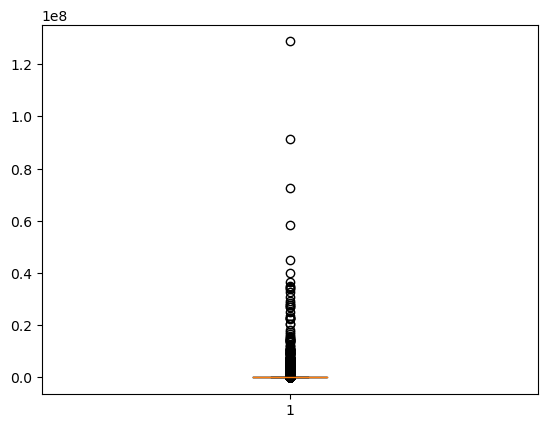

In [32]:
plt.boxplot(df['ORDER_AMOUNT'])
plt.show()

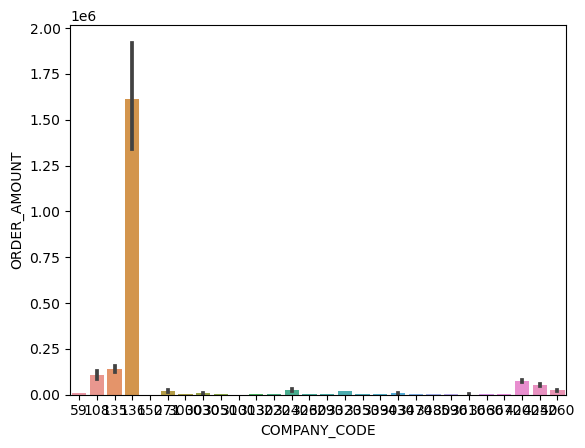

In [33]:
sns.barplot(x=df['COMPANY_CODE'], y=df['ORDER_AMOUNT'], data=df)
plt.show()

PART 3 

In [34]:
import numpy as np

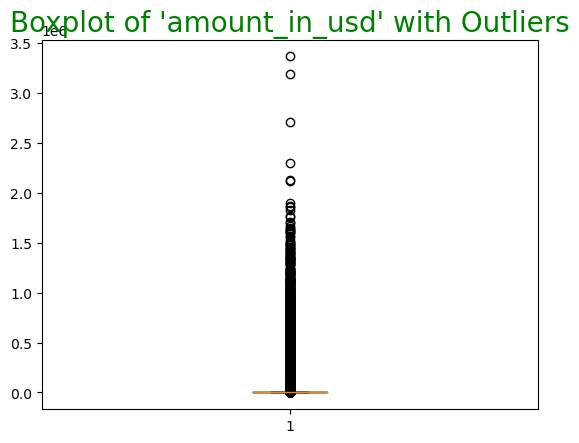

Number of Outliers:  101252


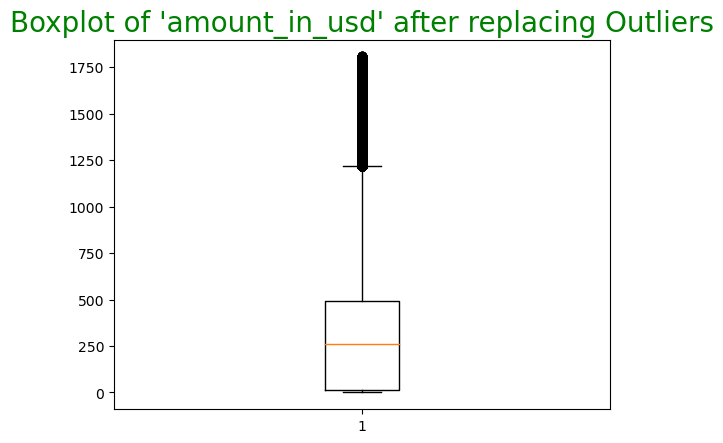

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43012,SR02,756141537,954.61,1970-01-01 00:00:00.020220113,EUR,NaN,12311807,1021.4327,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,1970-01-01 00:00:00.020220101,43114,NR03,798847812,787.36,1970-01-01 00:00:00.020220111,EUR,NaN,12311807,842.4752,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,1970-01-01 00:00:00.020220101,110019,NR01,960984659,67493.46,1970-01-01 00:00:00.020220112,EUR,93.0,12118758,260.8100,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,1970-01-01 00:00:00.020220101,153013,SR02,925857642,1405.54,1970-01-01 00:00:00.020220106,EUR,93.0,1210499770,1503.9278,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,1970-01-01 00:00:00.020220101,160020,SR01,947942786,0.00,1970-01-01 00:00:00.020220106,EUR,64.0,1210351400,0.0000,1210354690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,Germany,South-Region,"0,00",NaN,4260,1970-01-01 00:00:00.020220601,74357,NR02,946056501,4415.19,1970-01-01 00:00:00.020220601,SGD,NaN,1210331804,260.8100,1210336064
1074779,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,1970-01-01 00:00:00.020220601,84052,NR04,894775488,0.00,1970-01-01 00:00:00.020220601,SGD,NaN,1210331804,0.0000,1210336064
1074780,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,1970-01-01 00:00:00.020220601,85322,NR01,909729781,0.00,1970-01-01 00:00:00.020220601,SGD,NaN,1210331811,0.0000,1210336071
1074781,926668029,3235,Panama,South-Region,"0,00",NaN,4260,1970-01-01 00:00:00.020220601,90538,SR04,940836817,0.00,1970-01-01 00:00:00.020220601,SGD,NaN,1210331811,0.0000,1210336071


In [35]:
# Need to create a boxplot to study the position of the outliers
plt.boxplot(df['amount_in_usd'])
plt.title("Boxplot of 'amount_in_usd' with Outliers", color='green', fontsize=20)
plt.show()

#Using IQR Method
Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
median_value = df['amount_in_usd'].median()

outliers = df[(df['amount_in_usd'] > upper_bound) | (df['amount_in_usd'] < lower_bound)]
print('Number of Outliers: ', len(outliers))

# Replacing the outliers with the IQR Median values
df['amount_in_usd'] = np.where((df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound), median_value, df['amount_in_usd'])

# To Study the difference in the Boxplots before & After
plt.boxplot(df['amount_in_usd'])
plt.title("Boxplot of 'amount_in_usd' after replacing Outliers", color='green', fontsize=20)
plt.show()

df

In [36]:
# To convert strings into numeric values
from sklearn import preprocessing

# By Label Encoding
le = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,946851639,3537,232,1,1,0,3220,0,43012,5,756141537,954.61,12,6,NaN,12311807,1021.4327,12315027
1,963432061,3449,135,1,1,0,3220,0,43114,2,798847812,787.36,10,6,NaN,12311807,842.4752,12315027
2,971991639,3238,141,1,43496,204,3260,0,110019,0,960984659,67493.46,11,6,93.0,12118758,260.8100,12122018
3,754349803,3911,228,1,7852,255,3290,0,153013,5,925857642,1405.54,5,6,93.0,1210499770,1503.9278,1210503060
4,930253442,2381,82,1,1,255,3290,0,160020,4,947942786,0.00,5,6,64.0,1210351400,0.0000,1210354690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,79,1,1,350,4260,151,74357,1,946056501,4415.19,151,18,NaN,1210331804,260.8100,1210336064
1074779,998890898,4509,10,1,1,350,4260,151,84052,3,894775488,0.00,151,18,NaN,1210331804,0.0000,1210336064
1074780,983330221,3951,151,1,1,350,4260,151,85322,0,909729781,0.00,151,18,NaN,1210331811,0.0000,1210336071
1074781,926668029,3235,167,1,1,350,4260,151,90538,7,940836817,0.00,151,18,NaN,1210331811,0.0000,1210336071


In [37]:
continuous_cols = df.select_dtypes(include=np.number).columns

# Applying Log Transformation to all continuous or numeric columns=
df[continuous_cols] = np.log1p(df[continuous_cols])
df[continuous_cols]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,uniue_cust_id
0,20.668653,8.171317,5.451038,0.693147,0.693147,0.000000,8.077447,0.000000,10.669258,1.791759,20.443739,6.862350,2.564949,1.945910,NaN,16.326069,6.929940,16.326331
1,20.686013,8.146130,4.912655,0.693147,0.693147,0.000000,8.077447,0.000000,10.671626,1.098612,20.498681,6.669955,2.397895,1.945910,NaN,16.326069,6.737531,16.326331
2,20.694858,8.083020,4.955827,0.693147,10.680447,5.323010,8.089789,0.000000,11.608417,0.000000,20.683469,11.119801,2.484907,1.945910,4.543295,16.310265,5.567619,16.310534
3,20.441367,8.271804,5.433722,0.693147,8.968651,5.545177,8.098947,0.000000,11.938285,1.791759,20.646231,7.248888,1.791759,1.945910,4.543295,20.914299,7.316500,20.914302
4,20.650968,7.775696,4.418841,0.693147,0.693147,5.545177,8.098947,0.000000,11.983060,1.609438,20.669805,0.000000,1.791759,1.945910,4.174387,20.914177,0.000000,20.914179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,20.564980,7.823646,4.382027,0.693147,0.693147,5.860786,8.357259,5.023881,11.216647,0.693147,20.667813,8.393033,5.023881,2.944439,NaN,20.914160,5.567619,20.914164
1074779,20.722156,8.414052,2.397895,0.693147,0.693147,5.860786,8.357259,5.023881,11.339203,1.386294,20.612083,0.000000,5.023881,2.944439,NaN,20.914160,0.000000,20.914164
1074780,20.706456,8.281977,5.023881,0.693147,0.693147,5.860786,8.357259,5.023881,11.354199,0.000000,20.628658,0.000000,5.023881,2.944439,NaN,20.914160,0.000000,20.914164
1074781,20.647106,8.082093,5.123964,0.693147,0.693147,5.860786,8.357259,5.023881,11.413536,2.079442,20.662280,0.000000,5.023881,2.944439,NaN,20.914160,0.000000,20.914164


In [38]:
# Extracting Sum & Average Order Amount in USD per Distribution Channel
features = df.groupby('DISTRIBUTION_CHANNEL').agg(total_amount_in_usd = ('amount_in_usd', 'sum'), average_amount_in_usd = ('amount_in_usd', 'mean'))
print(features)

                      total_amount_in_usd  average_amount_in_usd
DISTRIBUTION_CHANNEL                                            
0.000000                     18890.844468               4.369846
0.693147                     19475.195317               4.405156
1.098612                     19053.152318               4.333216
1.386294                     20024.614668               4.440048
1.609438                     19787.312114               4.411887
...                                   ...                    ...
5.476464                     18885.419189               4.388896
5.480639                     18724.363453               4.319346
5.484797                     19253.011622               4.408750
5.488938                     19508.443366               4.413675
5.493061                     19548.545433               4.418749

[243 rows x 2 columns]


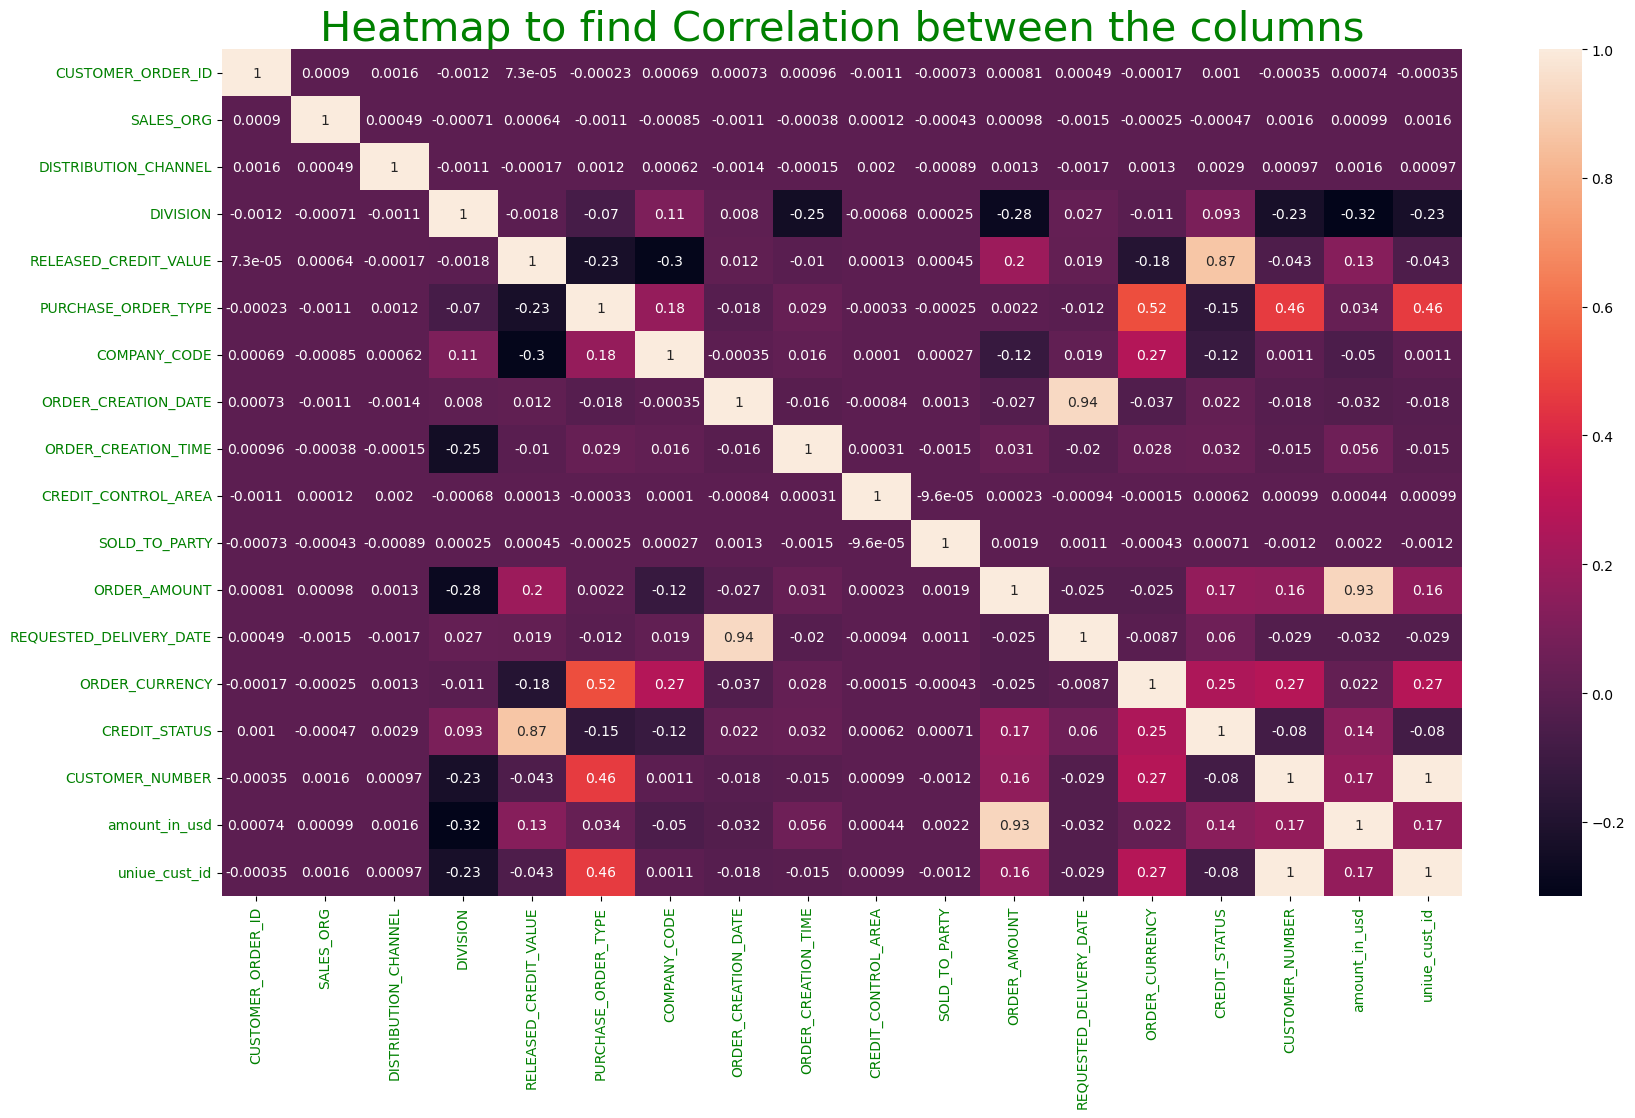

In [40]:
# To Study the correlation between the columns using this heatmap
plt.figure(figsize=(20,11))
sns.heatmap(df.corr(), annot=True)  
plt.title('Heatmap to find Correlation between the columns', fontsize=30, color='green')
plt.xticks(color='green')
plt.yticks(color='green')
plt.show()

In [41]:
# Identifying High Correlation Matrix Values
corr_matrix = df.corr().abs()
high_corr = np.where(corr_matrix > 0.7)
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print(high_corr)

[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'), ('ORDER_AMOUNT', 'amount_in_usd'), ('CUSTOMER_NUMBER', 'uniue_cust_id')]


PART 4

In [44]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop = True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

# Adding of new relevant Columns by Date Shifting
df = difference_in_days(df, 7, 1, 'uniue_cust_id', 'ORDER_CREATION_DATE', 'amount_in_usd')

In [45]:
for column in df.columns:
 # Find the Highest Frequency Element in a column
 highest_frequency_element = df[column].value_counts().idxmax()
 # Replace NaN values with the Highest Frequency Element
 df[column].fillna(highest_frequency_element,inplace=True)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,20.668653,8.171317,5.451038,0.693147,0.693147,0.000000,8.077447,0.000000,10.669258,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,20.686013,8.146130,4.912655,0.693147,0.693147,0.000000,8.077447,0.000000,10.671626,1.098612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,20.694858,8.083020,4.955827,0.693147,10.680447,5.323010,8.089789,0.000000,11.608417,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,20.441367,8.271804,5.433722,0.693147,8.968651,5.545177,8.098947,0.000000,11.938285,1.791759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,20.650968,7.775696,4.418841,0.693147,0.693147,5.545177,8.098947,0.000000,11.983060,1.609438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,20.564980,7.823646,4.382027,0.693147,0.693147,5.860786,8.357259,5.023881,11.216647,0.693147,...,5.567619,5.567619,5.567619,1.362216,0.000000,0.000000,0.0,0.0,0.0,0.0
1074779,20.722156,8.414052,2.397895,0.693147,0.693147,5.860786,8.357259,5.023881,11.339203,1.386294,...,5.567619,5.567619,5.567619,-1.362216,1.362216,0.000000,0.0,0.0,0.0,0.0
1074780,20.706456,8.281977,5.023881,0.693147,0.693147,5.860786,8.357259,5.023881,11.354199,0.000000,...,5.567619,5.567619,5.567619,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1074781,20.647106,8.082093,5.123964,0.693147,0.693147,5.860786,8.357259,5.023881,11.413536,2.079442,...,5.567619,5.567619,5.567619,-5.567619,0.000000,0.000000,0.0,0.0,0.0,0.0


In [46]:
# Dropping irrelevant columns which won't be required for model implementations as compared to our target variable
df = df.drop(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', "DIVISION", 'COMPANY_CODE', 'ORDER_CREATION_DATE',
              'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY', 'REQUESTED_DELIVERY_DATE', 'CUSTOMER_NUMBER',
              'ORDER_AMOUNT', 'Last-1day_Diff', 'Last-2day_Diff', 'Last-3day_Diff', 'Last-4day_Diff', 
              'Last-5day_Diff', 'Last-6day_Diff', 'Last-7day_Diff'], axis=1)
df

,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,ORDER_CREATION_TIME,ORDER_CURRENCY,CREDIT_STATUS,amount_in_usd,uniue_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-4day_Sales,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales
0,0.693147,0.000000,10.669258,1.945910,0.000000,6.929940,16.326331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.693147,0.000000,10.671626,1.945910,0.000000,6.737531,16.326331,6.929940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10.680447,5.323010,11.608417,1.945910,4.543295,5.567619,16.310534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,8.968651,5.545177,11.938285,1.945910,4.543295,7.316500,20.914302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.693147,5.545177,11.983060,1.945910,4.174387,0.000000,20.914179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,0.693147,5.860786,11.216647,2.944439,0.000000,5.567619,20.914164,6.929836,5.567619,5.567619,5.567619,5.567619,5.567619,5.567619
1074779,0.693147,5.860786,11.339203,2.944439,0.000000,0.000000,20.914164,5.567619,6.929836,5.567619,5.567619,5.567619,5.567619,5.567619
1074780,0.693147,5.860786,11.354199,2.944439,0.000000,0.000000,20.914164,5.567619,5.567619,5.567619,5.567619,5.567619,5.567619,5.567619
1074781,0.693147,5.860786,11.413536,2.944439,0.000000,0.000000,20.914164,0.000000,5.567619,5.567619,5.567619,5.567619,5.567619,5.567619


In [47]:
from sklearn.model_selection import train_test_split

# Taking 'y' as our target column - 'amount_in_USD'
y = df['amount_in_usd']

# Rest all columns to be considered as 'x'
x = df[["RELEASED_CREDIT_VALUE", "PURCHASE_ORDER_TYPE", 'ORDER_CREATION_TIME',  'ORDER_CURRENCY', 'CREDIT_STATUS', 'uniue_cust_id',
         "Last-1day_Sales", "Last-2day_Sales", "Last-3day_Sales", "Last-4day_Sales", 'Last-5day_Sales', 
        'Last-6day_Sales', 'Last-7day_Sales']]

# Splitting our dataset into Training & Testing Data with 80:20 Ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(len(x_train))
print(len(x_test))

859826
214957


In [48]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [49]:
# Training the model
linear.fit(x_train, y_train)

LinearRegression()

In [50]:
# Calculating Training & Testing Accuracies
print(linear.score(x_train, y_train))
print(linear.score(x_test, y_test))

0.7038517367365992
0.7022453054893222


In [51]:
# from sklearn.svm import SVR
# svm = SVR()
##Training
# svm.fit(x_train, y_train)
##Testing
#print(svm.score(x_train, y_train)
#print(svm.score(x_test, y_test))

# COULD NOT RUN DUE TO HUGE CONSUMPTION OF TIME

In [52]:
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor()

In [53]:
# Training the model
decision.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
# Calculating Training & Testing Accuracies
print(decision.score(x_train, y_train))
print(decision.score(x_test, y_test))

0.9972528270978509
0.5797417231727717


In [55]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

In [56]:
# Training the model
random.fit(x_train, y_train)

RandomForestRegressor()

In [57]:
# Calculating Training & Testing Accuracies
print(random.score(x_train, y_train))
print(random.score(x_test, y_test))

0.9677489990644217
0.7837996558897458


In [59]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [60]:
# Training the Model
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [61]:
# Calculating Training & Testing Accuracies
print(ada.score(x_train, y_train))
print(ada.score(x_test, y_test))

0.6849464661906206
0.6830236022172202


In [62]:
import xgboost
xg = xgboost.XGBRegressor()

In [63]:
# Training the model
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
# Calculating Training & Testing Accuracies
print(xg.score(x_train, y_train))
print(xg.score(x_test, y_test))

0.8038926632508241
0.7949401635518714


In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [66]:
# Testing the model
linear_y_pred = linear.predict(x_test)

# Evaluating MSE
mse_lr = mean_squared_error(y_test, linear_y_pred)
# Evaluating RMSE
rmse_lr = np.sqrt(mse_lr)
# Evaluating MAE
mae_lr = mean_absolute_error(y_test, linear_y_pred)
# Evaluating R-SQUARE
r2_lr = r2_score(y_test, linear_y_pred)

print('MSE = ', mse_lr)
print('RMSE = ', rmse_lr)
print('MAE = ', mae_lr)
print('R-Square = ', r2_lr)

MSE =  1.9397948146220858
RMSE =  1.3927651685126556
MAE =  0.9060327543172267
R-Square =  0.7022453054893222


In [67]:
# SVM COULD NOT RUN

In [68]:
# Testing the model
decision_y_pred = decision.predict(x_test)

# Evaluating MSE
mse_dt = mean_squared_error(decision_y_pred, y_test)
# Evaluating RMSE
rmse_dt = np.sqrt(mse_dt)
# Evaluating MAE
mae_dt = mean_absolute_error(decision_y_pred, y_test)
# Evaluating R-SQUARE
r2_dt = r2_score(decision_y_pred, y_test)

print('MSE = ', mse_dt)
print('RMSE = ', rmse_dt)
print('MAE = ', mae_dt)
print('R-Square = ', r2_dt)

MSE =  2.7378739654505626
RMSE =  1.6546522188818298
MAE =  0.9165198754862243
R-Square =  0.5826704482413538


In [69]:
# Testing the model
random_y_pred = random.predict(x_test)

# Evaluating MSE
mse_rf = mean_squared_error(y_test, random_y_pred)
# Evaluating RMSE
rmse_rf = np.sqrt(mse_rf)
# Evaluating MAE
mae_rf = mean_absolute_error(y_test, random_y_pred)
# Evaluating R-SQAURE
r2_rf = r2_score(y_test, random_y_pred)

print('MSE = ', mse_rf)
print('RMSE = ', rmse_rf)
print('MAE = ', mae_rf)
print('R-Square = ', r2_rf)

MSE =  1.408489317401987
RMSE =  1.1867979261028336
MAE =  0.6981830250940763
R-Square =  0.7837996558897458


In [70]:
# Testing the model
ada_y_pred = ada.predict(x_test)

# Evaluating MSE
mse_ad = mean_squared_error(y_test, ada_y_pred)
# Evaluating RMSE
rmse_ad = np.sqrt(mse_ad)
# Evaluating MAE
mae_ad = mean_absolute_error(y_test, ada_y_pred)
# Evaluating R-SQAURE
r2_ad = r2_score(y_test, ada_y_pred)

print('MSE = ', mse_ad)
print('RMSE = ', rmse_ad)
print('MAE = ', mae_ad)
print('R-Square = ', r2_ad)

MSE =  2.065019239367774
RMSE =  1.4370174805366056
MAE =  1.052551212254293
R-Square =  0.6830236022172202


In [71]:
# Testing the model
xg_y_pred = xg.predict(x_test)

# Evaluating MSE
mse_xg = mean_squared_error(y_test, xg_y_pred)
# Evaluating RMSE
rmse_xg = np.sqrt(mse_xg)
# Evaluating MAE
mae_xg = mean_absolute_error(y_test, xg_y_pred)
# Evaluating R-SQAURE
r2_xg = r2_score(y_test, xg_y_pred)

print('MSE = ', mse_xg)
print('RMSE = ', rmse_xg)
print('MAE = ', mae_xg)
print('R-Square = ', r2_xg)

MSE =  1.3359117916949192
RMSE =  1.155816504335753
MAE =  0.7067004296542618
R-Square =  0.7949401635518714


In [72]:
# Mapping all Model Evaluations into a Table

labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
mse_values = [mse_lr, mse_dt, mse_rf, mse_ad, mse_xg]
rmse_values = [rmse_lr, rmse_dt, rmse_rf, rmse_ad, rmse_xg]
mae_values = [mae_lr, mae_dt, mae_rf, mae_ad, mae_xg]
r2_values = [r2_lr, r2_dt, r2_rf, r2_ad, r2_xg]

data = {
    'Model': labels,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-Squared': r2_values
}

df_val = pd.DataFrame(data)
df_val.set_index('Model', inplace=True)
df_val

,MSE,RMSE,MAE,R-Squared
Model,,,,
Linear Regression,1.939795,1.392765,0.906033,0.702245
Decision Tree,2.737874,1.654652,0.916520,0.582670
Random Forest,1.408489,1.186798,0.698183,0.783800
AdaBoost,2.065019,1.437017,1.052551,0.683024
XGBoost,1.335912,1.155817,0.706700,0.794940


In [73]:
print(max(r2_values))
# XGBOOST 

0.7949401635518714


In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Considering only 5 Lack Rows of Data for Faster HyperParameter Tuning
df = df[:500000]
df

,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,ORDER_CREATION_TIME,ORDER_CURRENCY,CREDIT_STATUS,amount_in_usd,uniue_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-4day_Sales,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales
0,0.693147,0.000000,10.669258,1.945910,0.000000,6.929940,16.326331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.693147,0.000000,10.671626,1.945910,0.000000,6.737531,16.326331,6.929940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10.680447,5.323010,11.608417,1.945910,4.543295,5.567619,16.310534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,8.968651,5.545177,11.938285,1.945910,4.543295,7.316500,20.914302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.693147,5.545177,11.983060,1.945910,4.174387,0.000000,20.914179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.693147,5.837730,12.220582,2.995732,0.000000,4.882499,20.930295,5.597273,5.467765,7.038854,5.426842,5.088830,6.777476,6.799557
499996,0.693147,5.837730,12.220252,2.995732,0.000000,6.697775,20.930295,4.882499,5.597273,5.467765,7.038854,5.426842,5.088830,6.777476
499997,0.693147,5.837730,12.219990,2.995732,0.000000,7.302786,20.930295,6.697775,4.882499,5.597273,5.467765,7.038854,5.426842,5.088830
499998,0.693147,5.837730,12.220577,2.995732,0.000000,6.003319,20.930295,7.302786,6.697775,4.882499,5.597273,5.467765,7.038854,5.426842


In [75]:
# Performing HyperParameter Tuning for XGBoost Model
# By RandomizedSearch Method
xg = xgboost.XGBRegressor()
xg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [76]:
# Define the Hyperparameter Grid to Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
}

In [77]:
random_search = RandomizedSearchCV(estimator = xg, param_distributions = param_grid, cv = 5, n_iter=10, 
                                   scoring = 'neg_mean_squared_error', random_state = 42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                             

In [78]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [79]:
# Evaluate the Model with the Best HyperParameters on the Test Set
best_model = random_search.best_estimator_
hp_xg_y_pred = best_model.predict(x_test)

hp_mse_xg = mean_squared_error(y_test, hp_xg_y_pred)
hp_rmse_xg = np.sqrt(hp_mse_xg)
hp_mae_xg = mean_absolute_error(y_test, hp_xg_y_pred)
hp_r2_xg = r2_score(y_test, hp_xg_y_pred)

print('MSE = ',hp_mse_xg)
print('RMSE = ',hp_rmse_xg)
print('MAE = ',hp_mae_xg)
print('R-Square = ',hp_r2_xg)

MSE =  1.3079351686536698
RMSE =  1.143649932738891
MAE =  0.6942551174722794
R-Square =  0.7992345202458346


In [80]:
print('The Best Possible Model Accuracy comes down to be = ', hp_r2_xg)
print('Thus, After HyperParameter Tuning the Model Accuracy increases from \n', r2_xg, 'to', hp_r2_xg, 'by', hp_r2_xg-r2_xg)

The Best Possible Model Accuracy comes down to be =  0.7992345202458346
Thus, After HyperParameter Tuning the Model Accuracy increases from 
 0.7949401635518714 to 0.7992345202458346 by 0.004294356693963275
